<a href="https://colab.research.google.com/github/Dianacalvario/estadisticaverano/blob/main/House_Price_Regression_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Dianacalvario/estadisticaverano/refs/heads/main/house_price_regression_dataset.csv")
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [ ]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

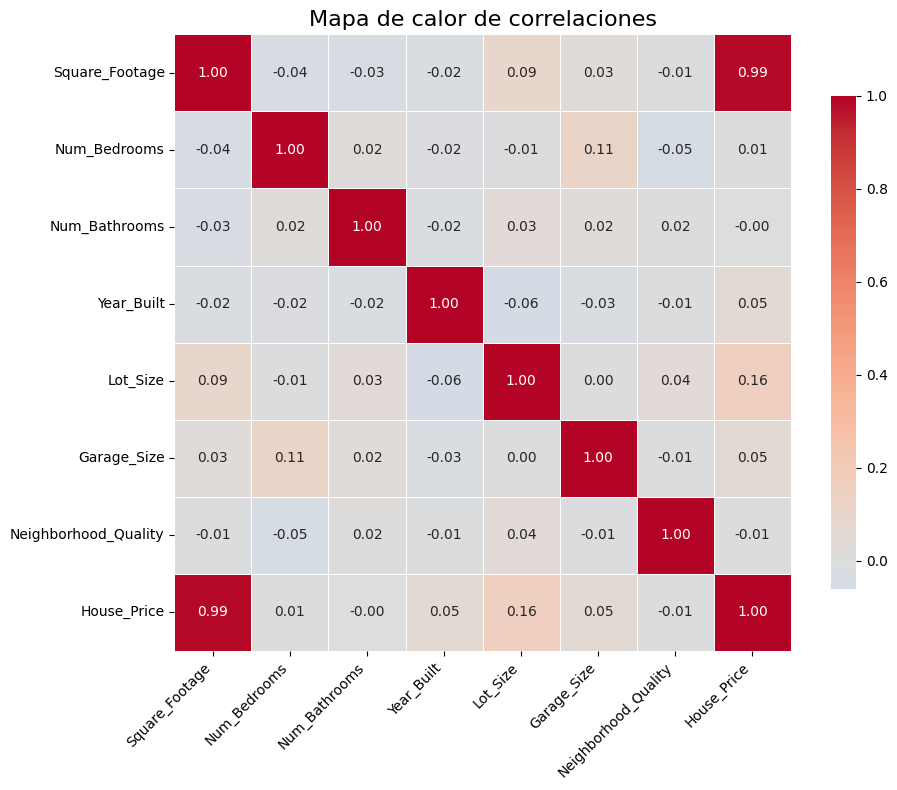

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
matriz_correlacion = df.corr(numeric_only=True)

# Abre una ventana gráfica
plt.figure(figsize=(10, 8), dpi = 100)

# Crea un mápa de calor
sns.heatmap(
    matriz_correlacion,
    annot=True,  # Activa las anotaciones numéricas dentro de cada celda
    fmt=".2f",  #Formato para los números dentro de las celdas (cuando annot=True):
    cmap="coolwarm", # paleta de colores: "coolwarm", "bwr", "seismic", "RdBu", "PuOr", "BrBG", "PiYG", etc.
    center=0,  # Se fija un valor intermedio, dado que r va desde -1 a 1
    square=True,  # Se forza el cuadrado de cada celda
    linewidths=0.5, # Grosor del borde de la celda
    cbar_kws={"shrink": 0.8},  #Ajusta opciones de la barra de color (colorbar) que aparece al lado derecho
    )

plt.title("Mapa de calor de correlaciones", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
# plt.show()

Coeficiente de determinación:  0.9878

Intervalo de confianza para b1 de  95%
 197.4992 < b1 <  200.2850

valor-p de Shapiro:  0.0075

valor_p de Breusch-Pagan:  0.2170



,df,sum_sq,mean_sq,F,PR(>F)
Square_Footage,1.0,6.311477e+13,6.311477e+13,80192.896657,0.000000e+00
Lot_Size,1.0,3.330164e+11,3.330164e+11,423.126722,1.199143e-78
Residual,997.0,7.846758e+11,7.870369e+08,NaN,NaN


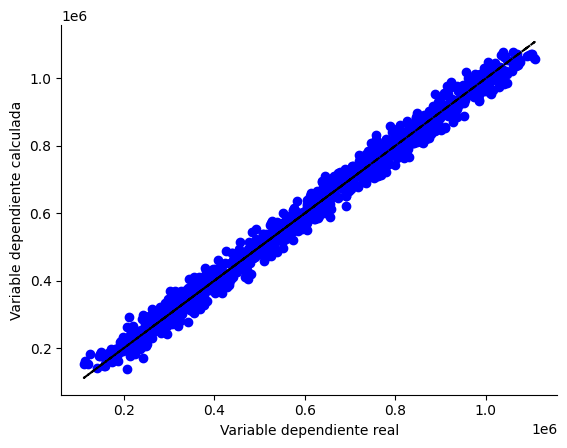

In [ ]:
x = df[["Square_Footage", "Lot_Size"]]
y = df["House_Price"]

import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)
plt.figure()
plt.plot(y, y, color = 'black', linestyle = '--')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.scatter(y, yc, color = 'blue')
plt.xlabel('Variable dependiente real')
plt.ylabel('Variable dependiente calculada')
plt.gca().spines[['top', 'right']].set_visible(False)

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('House_Price~Square_Footage+Lot_Size', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova


In [ ]:
modelo.params

,0
const,19658.572350
Square_Footage,198.892079
Lot_Size,14123.857369
